/Users/seulgi/anaconda3/envs/ptlesson/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/seulgi/anaconda3/envs/ptlesson/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:180: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


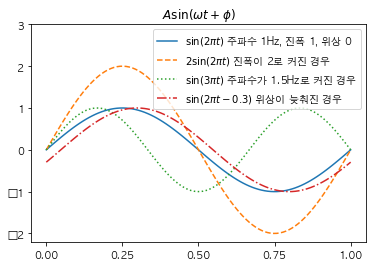

In [1]:
# 사운드 프로세싱 기초
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc
%matplotlib inline
rc('font', family='AppleGothic')

### 사인함수
t = np.linspace(0, 1, 100)
plt.plot(t, 1*np.sin(2*np.pi*t+0), ls="-" , label=r"$\sin\left(2\pi{t}\right)$ 주파수 1Hz, 진폭 1, 위상 0")
plt.plot(t, 2*np.sin(2*np.pi*t+0), ls="--", label=r"$2\sin\left(2\pi{t}\right)$ 진폭이 2로 커진 경우 ")
plt.plot(t, 1*np.sin(3*np.pi*t+0), ls=":" , label=r"$\sin\left(3\pi{t}\right)$ 주파수가 1.5Hz로 커진 경우")
plt.plot(t, 1*np.sin(2*np.pi*t-0.3), ls="-.", label=r"$\sin\left(2\pi{t} - 0.3\right)$ 위상이 늦춰진 경우")
plt.ylim(-2.2, 3)
plt.xticks(np.linspace(0, 1, 5))
plt.legend()
plt.title(r"$A\sin\left(\omega{t}+\phi\right)$")
plt.show()

In [2]:
### 싱글 톤
def single_tone(frequency, rate=44100, duration=1):
    t = np.linspace(0, duration, int(rate))
    y = np.sin(2*np.pi*frequency*t)
    return y

y = single_tone(400)

In [3]:
from IPython.display import Audio, display
display(Audio(y, rate=44100))

In [4]:
# octave
notes = 'C,C#,D,D#,E,F,F#,G,G#,A,A#,B,C'.split(',')
freqs = 220.*2**(np.arange(3,3+len(notes))/12.)
notes = list(zip(notes, freqs))
notes

[('C', 261.6255653005986),
 ('C#', 277.1826309768721),
 ('D', 293.6647679174076),
 ('D#', 311.1269837220809),
 ('E', 329.6275569128699),
 ('F', 349.2282314330039),
 ('F#', 369.9944227116344),
 ('G', 391.99543598174927),
 ('G#', 415.3046975799451),
 ('A', 440.0),
 ('A#', 466.1637615180899),
 ('B', 493.8833012561241),
 ('C', 523.2511306011972)]

In [5]:
octave = np.hstack([single_tone(f) for f in freqs])
display(Audio(octave, rate=44100))

/Users/seulgi/anaconda3/envs/ptlesson/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/seulgi/anaconda3/envs/ptlesson/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:180: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


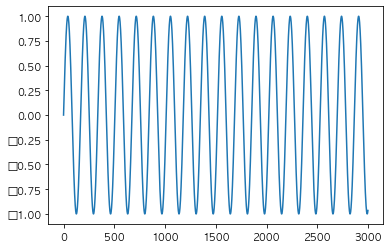

In [10]:
### wave 형식 파일
import scipy as sp
import scipy.io.wavfile
sp.io.wavfile.write("octave.wav", 44100, octave)
sr, y_read = sp.io.wavfile.read("octave.wav")
plt.plot(y_read[:3000])
plt.show()

In [11]:
Audio(y_read, rate=sr)